In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# Iterative Methods for Solving Linear Equations

If A is a large sparse matrix, direct methods (like LU decomposition) can be inefficient. Iterative methods provide an alternative approach to find an approximate solution.

**Definition** Let $A,B,C$ be $n \times n$ matrices a decomposition of $A$ is given by $A = B-C$, here $B$ is invertible.

With this decomposition we write the Iteration-Procedure as:

$$Bx^{(k+1)} = Cx^{(k)} + b$$

We want a $B$ such that:

+ This iteration is converging fast
+ The system is easily solvable

## Jacobi Method

We decompose $A = L + U + D$ with $L$ the strictly lower triangular part, $U$ the strictly upper triangular part and $D$ the diagonal part of $A$. We set $B = D$ and $C = -(L+U)$.

This gives us the iteration:

$$Dx^{(k+1)} = -(L+U)x^{(k)} + b$$

which we can rearrange into:

$$x^{(k+1)} = D^{-1}(-L-U)x^{(k)} + D^{-1}b$$

Iterations for different sizes: [1001, 1001, 1001]
Errors compared to numpy's solver: [np.float64(0.6570334966924918), np.float64(80.41079484959994), np.float64(6038.874955584495)]


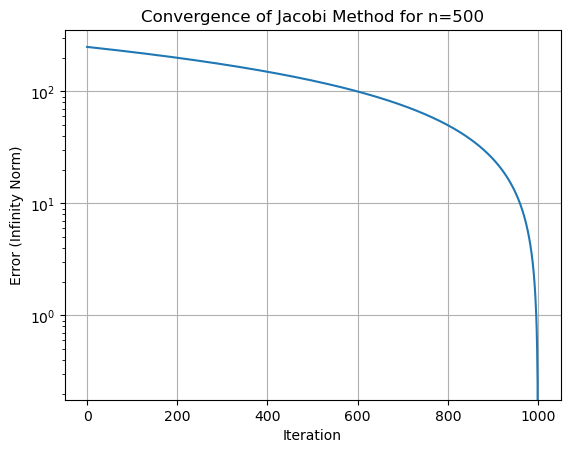

In [18]:
def jacobi(A,b,x0, tol=1e-12, max_iter=1000):
    """ 
    Solve a linear system Ax = b using the Jacobi iterative method.
    """
    n = len(b)
    x = np.copy(x0)
    xs = [x0] # Store iterations of solution vector
    for it in range(max_iter):
        x_new = x.copy()
        D = np.diag(A)
        R = A - np.diagflat(D)
        x_new = np.linalg.solve(np.diag(D), b - np.dot(R, x))
        xs.append(x_new)
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    return x, xs

# Initialize Large Sparse Matrices

def create_sparse_matrix(n):
    """ Create a large sparse matrix for testing iterative methods. """
    A = np.zeros((n,n))
    for i in range(n):
        A[i,i] = 4
        if i > 0:
            A[i,i-1] = -1
        if i < n-1:
            A[i,i+1] = -1
        if i > 1:
            A[i,i-2] = -1
        if i < n-2:
            A[i,i+2] = -1
    return A

n_list = [50, 100, 500]
b_list = [np.ones(n) for n in n_list]
x0_list = [np.zeros(n) for n in n_list]
A_list = [create_sparse_matrix(n) for n in n_list]
results = [jacobi(A, b, x0) for A, b, x0 in zip(A_list, b_list, x0_list)]
iterations = [len(res[1]) for res in results]
# Compare with numpy's solver
numpy_solutions = [np.linalg.solve(A, b) for A, b in zip(A_list, b_list)]
errors = [np.linalg.norm(res[0] - numpy_sol, ord=np.inf) for res, numpy_sol in zip(results, numpy_solutions)]
print("Iterations for different sizes:", iterations)
print("Errors compared to numpy's solver:", errors)

# Plot convergence for the largest matrix
largest_n = n_list[-1]
largest_A = A_list[-1]
largest_b = b_list[-1]
largest_x0 = x0_list[-1]
solution, xs = jacobi(largest_A, largest_b, largest_x0)
errors = [np.linalg.norm(x - solution, ord=np.inf) for x in xs]
plt.semilogy(errors)
plt.xlabel('Iteration')
plt.ylabel('Error (Infinity Norm)')
plt.title('Convergence of Jacobi Method for n={}'.format(largest_n))
plt.grid()
plt.show()

## Gauss-Seidel Method

Here we set $B = D + L$ and $C = -U$ which gives us the iteration:

$$(D+L)x^{(k+1)} = -Ux^{(k)} + b$$

which we can rearrange into:

$$x^{(k+1)} = (D+L)^{-1}(-U)x^{(k)} + (D+L)^{-1}b$$

In [14]:
def gauss_seidel(A,b,x0,tol=1e-12,max_iter=1000):
    """ 
    Solve a linear system using the Gauss-Seidel iterative method.
    """
    n = len(b)
    x = np.copy(x0)
    xs = [x0]
    for it in range(max_iter):
        x_new = np.copy(x)
        B = np.tril(A)
        C = A - B
        x_new = np.linalg.solve(B, -C@x + b)
        xs.append(x_new)
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    return x, xs

# Test Gauss-Seidel Method
gs_results = [gauss_seidel(A, b, x0) for A, b, x0 in zip(A_list, b_list, x0_list)]
gs_iterations = [len(res[1]) for res in gs_results]
gs_errors = [np.linalg.norm(res[0] - numpy_sol, ord=np.inf) for res, numpy_sol in zip(gs_results, numpy_solutions)]
print("Gauss-Seidel Iterations for different sizes:", gs_iterations)
print("Gauss-Seidel Errors compared to numpy's solver:", gs_errors)


Gauss-Seidel Iterations for different sizes: [23, 47, 147]
Gauss-Seidel Errors compared to numpy's solver: [np.float64(6.736278201913137e-13), np.float64(1.712074926274454e-12), np.float64(5.044853423896711e-12)]


If we again consider this update rule $Bx^{(k+1)} = Cx^{(k)} + b$, because $B$ is invertible we can write this as:

$$x^{(k+1)} = Hx^{(k)} + c$$

with $H = B^{-1}C$ and $c = B^{-1}b$. 

**Theorem** The iteration $x^{(k+1)} = Hx^{(k)} + c$ converges for any starting value $x^{(0)}$ if and only if the spectral radius $\rho(H) < 1$. In this case the limit is the unique solution of the linear system $Ax = b$

